In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

In [7]:
def extract_salary(job_element):
    salary_tags = job_element.find_all('li')
    for tag in salary_tags:
        if 'Lacs' in tag.text:
            return tag.text.strip().replace('₹Rs','').replace('Lacs p.a.','')
    return 'Not Provided'

def scrape_jobs(pages):
    all_data = []
    experience_required_list = []

    for page in range(1, pages + 1):
        url = f'https://www.timesjobs.com/candidate/job-search.html?from=submit&luceneResultSize=25&txtKeywords=0DQT0Data%20Analyst0DQT0%20,0DQT0Data%20Mining0DQT0,0DQT0Data%20Architect0DQT0,0DQT0Machine%20Learning0DQT0,0DQT0Power%20Bi0DQT0,0DQT0Business%20Analyst0DQT0,0DQT0senior%20business%20analyst0DQT0,0DQT0Bi%20Developer0DQT0&postWeek=7&searchType=personalizedSearch&actualTxtKeywords=0DQT0Data%20Analyst0DQT0%20,0DQT0Data%20Mining0DQT0,0DQT0Data%20Architect0DQT0,0DQT0Machine%20Learning0DQT0,0DQT0Power%20Bi0DQT0,0DQT0Business%20Analyst0DQT0,senior%20business%20analyst,0DQT0Bi%20Developer0DQT0&searchBy=0&rdoOperator=OR&pDate=I&sequence={page}&startPage=1'
        html_text = requests.get(url).text
        soup = BeautifulSoup(html_text, 'lxml')
        for item in soup.find_all('ul', {'class': 'top-jd-dtl clearfix'}):
            exp_tag = item.find('li')
            if exp_tag and 'yrs' in exp_tag.text:
                experience = exp_tag.text.replace('card_travel', '').strip().replace('yrs','')
                experience_required_list.append(experience)
            else:
                experience_required_list.append('Does not Exists')
        job_listings = soup.find_all('li', class_='clearfix job-bx wht-shd-bx')

        for job in job_listings:
            skills = job.find('span', class_='srp-skills').text.strip().replace(' ', '').replace('\r', '').replace('\n', '').replace('.', 'Does not Exists')
            location_element = job.find('ul', class_='top-jd-dtl clearfix')
            location = location_element.find('span').text.strip() if location_element else 'Does not Exists'
            posted_ago = job.find('span', class_='sim-posted').span.text.strip().replace('\r', '').replace('Posted ', '').replace('\t', '').replace('\n', '')
            company_name = job.find('h3', class_='joblist-comp-name').text.strip().replace('\r', '').replace('\n', '').replace(' (More Jobs)', '')

            job_data = {
                'Job Title': job.find('h2').text.strip(),
                'Company': company_name,
                'Skills Required': skills,
                'Job Posted Ago': posted_ago,
                'Location': location,
                'Salary(Lacs p.a.)': extract_salary(job)
            }
            all_data.append(job_data)
    df = pd.DataFrame(all_data)
    df['Experience Required(Years)'] = experience_required_list

    return df
df = scrape_jobs(10)

In [33]:
print('Scraped Data from Multiple Pages:')
df.head(100)

Scraped Data from Multiple Pages:


,Job Title,Company,Skills Required,Job Posted Ago,Location,Salary(Lacs p.a.),Experience Required(Years)
0,Power BI Developer,Alpha Tech,"AzureAnalysisServices,AmazonAws,Devops,Jenkins...",1 day ago,"Bengaluru / Bangalore, Chennai, Hyderabad/Se...",4.50 - 7.50,0 - 1
1,Senior Business Analyst / Data Engineer - Pyth...,New Global Technologies,"CloudComputing,Saas,DataBaseAdministration,bus...",1 day ago,"Bengaluru / Bangalore, Delhi/NCR, Hyderabad/...",4.00 - 14.00,1 - 6
2,"Sr. Business Development manager , Supply Chai...",Sarosh Karki,"Purchase,MaterialsManagement,SupplyChainManage...",2 days ago,"Bengaluru / Bangalore, Kolkata, Mumbai",Not Provided,14 - 19
3,Urgent opening in Canada / Australia / Mal...,Uprooting Advisor's,"Salesmanagers,Marketing,softwareengineer,senio...",1 day ago,"New York City, Australia, Canada, New Zeala...",11.30 - 22.40,1 - 6
4,Development Power BI Developer,kanmalai technologies,"python,bi,esri,sql,security,adb",3 days ago,Coimbatore,Not Provided,4 - 6
...,...,...,...,...,...,...,...
112,Fusion HCM Solution Architect,LTIMindtree Ltd.,"""FusionHCM"",""SaaSHCM"",""CloudHCM"",""SolutionArch...",4 days ago,"Bengaluru / Bangalore, Hyderabad/Secunderabad...",Not Provided,4 - 9
113,SAP ABAP Hana,2COMS Consulting Pvt Ltd,ReactNative,1 day ago,Delhi,Not Provided,2 - 7
114,Data Science Internship in Ahmedabad,Maxgen Technologies,Does not Exists,5 days ago,"Ahmedabad, Bhavnagar, Gandhinagar, Jamnagar...",Not Provided,0 - 1
115,Data Science Internship in Pune,Maxgen Technologies,Does not Exists,few days ago,"Pune, Jalgaon, Kolhapur, Nagpur, Solapur",Not Provided,0 - 1


# data analysis of the scrapped data

In [9]:
print('Info:')
df.info()

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Job Title                   250 non-null    object
 1   Company                     250 non-null    object
 2   Skills Required             250 non-null    object
 3   Job Posted Ago              250 non-null    object
 4   Location                    250 non-null    object
 5   Salary(Lacs p.a.)           250 non-null    object
 6   Experience Required(Years)  250 non-null    object
dtypes: object(7)
memory usage: 13.8+ KB


In [10]:
print('Total number of rows:',df.shape[0])
print('Total  number of columns:',df.shape[1])

Total number of rows: 250
Total  number of columns: 7


In [11]:
#print('Scrapped Columns:',df.columns,sep='\n',end='\n\n')

Scrapped Columns:
Index(['Job Title', 'Company', 'Skills Required', 'Job Posted Ago', 'Location',
       'Salary(Lacs p.a.)', 'Experience Required(Years)'],
      dtype='object')



In [12]:
#df.describe(include='object')

,Job Title,Company,Skills Required,Job Posted Ago,Location,Salary(Lacs p.a.),Experience Required(Years)
count,250,250,250,250,250,250,250
unique,168,120,202,7,62,24,55
top,Business Analyst,alliance recruitment agency,Does not Exists,3 days ago,Bengaluru / Bangalore,Not Provided,2 - 5
freq,25,13,8,54,70,223,26


# insights here are removing duplicates and NULL values with respective functions

In [14]:
# Removing duplicates

print('Before Removing Duplicates:')
print('Dataset Rows count:',df.shape[0])
print('Dataset Columns count:',df.shape[1],end='\n\n')
df.drop_duplicates(inplace=True)
print('After Removing Duplicates:')
print('Dataset Rows count:',df.shape[0])
print('Dataset Columns count:',df.shape[1])

Before Removing Duplicates:
Dataset Rows count: 215
Dataset Columns count: 7

After Removing Duplicates:
Dataset Rows count: 215
Dataset Columns count: 7


In [15]:
# Dropping NULL values

print('Before Removing Missing Values:')
print('Dataset Rows count:',df.shape[0])
print('Dataset Columns count:',df.shape[1],end='\n\n')
df['Location'].replace('', pd.NA, inplace=True)
df.dropna(subset=['Location'], inplace=True)
print('After Removing Missing Values:')
print('Dataset Rows count:',df.shape[0])
print('Dataset Columns count:',df.shape[1])

Before Removing Missing Values:
Dataset Rows count: 215
Dataset Columns count: 7

After Removing Missing Values:
Dataset Rows count: 206
Dataset Columns count: 7


In [17]:
print('Missing or bad data after data wrangling and cleaning:')
df.isnull().sum()

Missing or bad data after data wrangling and cleaning:


Job Title                     0
Company                       0
Skills Required               0
Job Posted Ago                0
Location                      0
Salary(Lacs p.a.)             0
Experience Required(Years)    0
dtype: int64

# visualizing data with the help of wordcloud to help find the most used terms

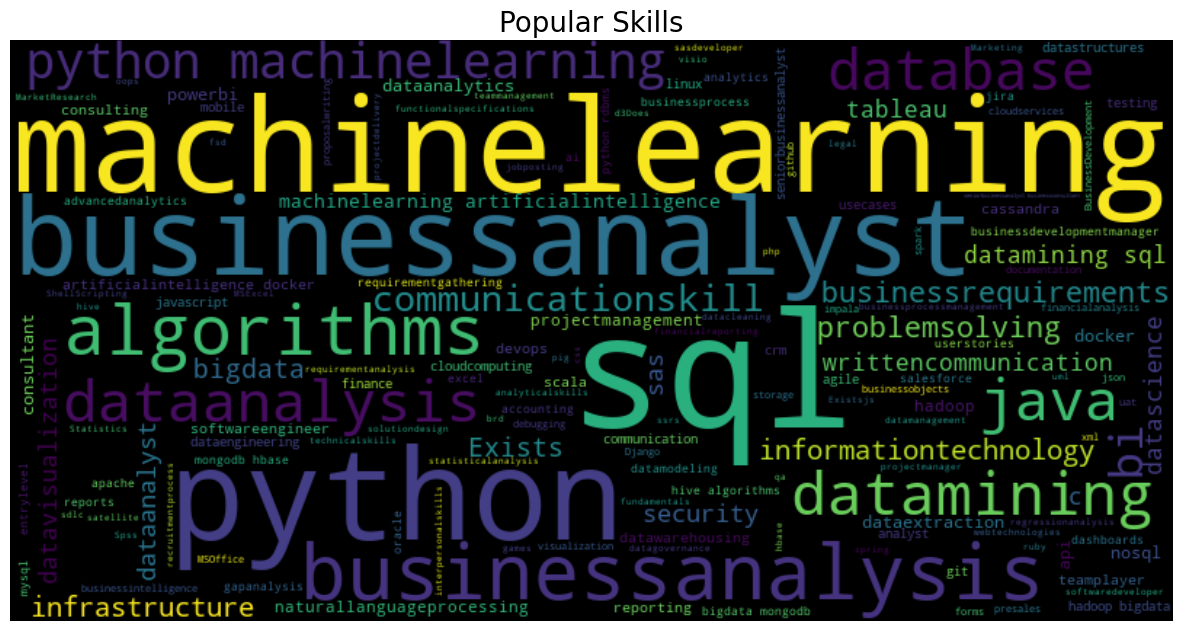

In [18]:
text3 = ' '.join(df['Skills Required'].values)
wordcloud2 = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(text3)
plt.figure(figsize=(15, 15))
plt.title("Popular Skills", fontsize=20)
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
#As inferred from the pie chart below, work from home is not present as an option of working mode currently

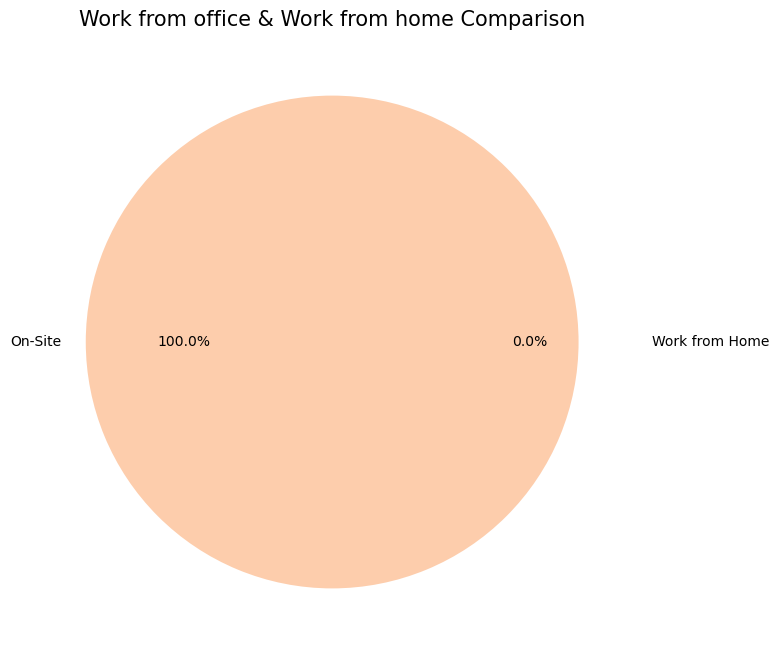

In [30]:
categories = ['Work from Home', 'On-Site']
counts = [df[df['Job Posted Ago'].str.contains('WFH', case=False)].shape[0],
          df.shape[0] - df[df['Job Posted Ago'].str.contains('WFH', case=False)].shape[0]]
explode = (0.2, 0)
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=categories, autopct='%1.1f%%', colors=sns.color_palette('Pastel2'), explode=explode)
plt.title('Work from office & Work from home Comparison',fontsize=15)
plt.show()

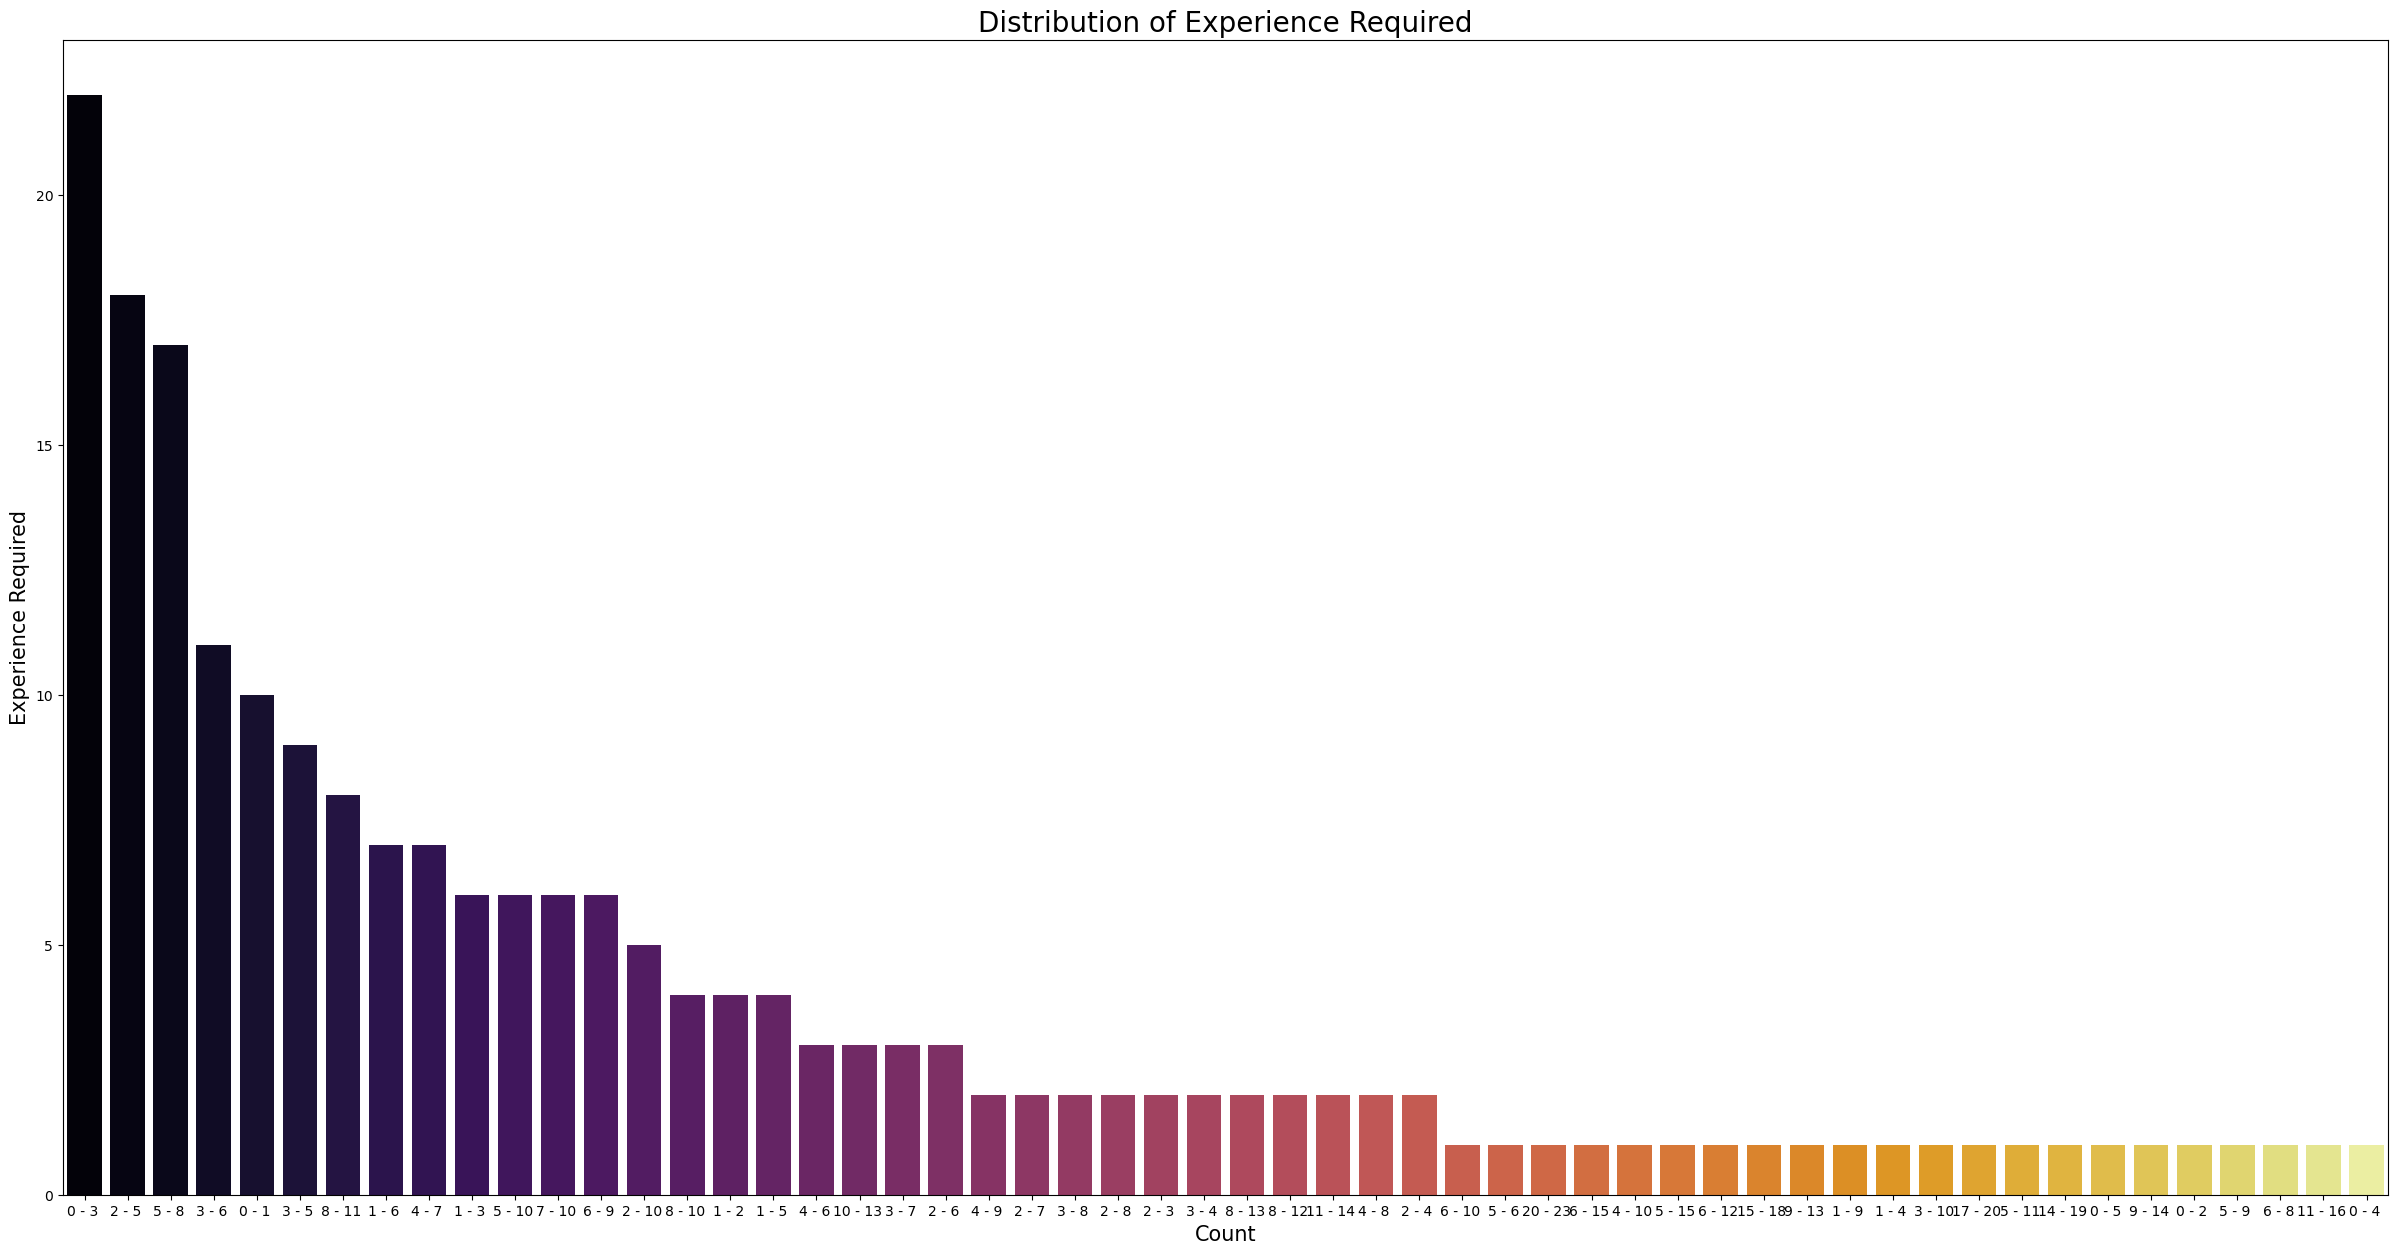

In [38]:
experience_counts = df['Experience Required(Years)'].value_counts()
plt.figure(figsize=(30, 15))
sns.barplot(x=experience_counts.index, y=experience_counts, palette='inferno')
plt.title('Distribution of Experience Required',fontsize=20)
plt.xlabel('Count',fontsize=15)
plt.ylabel('Experience Required',fontsize=15)
plt.show()

In [ ]:
# Trying to find the relation between experience required for higher paying jobs and the salaries

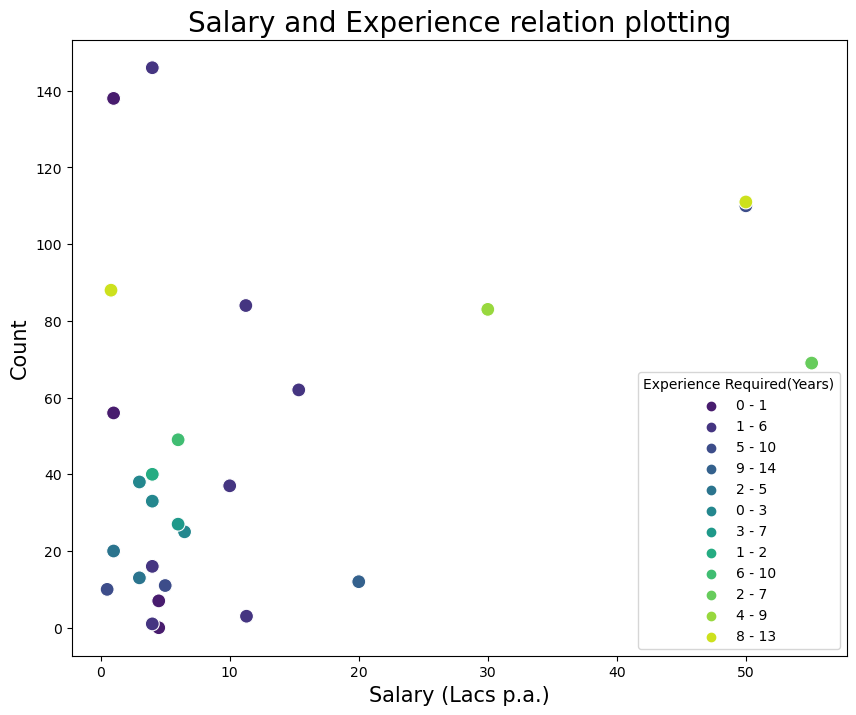

In [42]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Salary(Lacs p.a.)', y=df_salary.index, hue='Experience Required(Years)', data=df_salary, palette='viridis', s=100)
plt.title('Salary and Experience relation plotting',fontsize=20)
plt.xlabel('Salary (Lacs p.a.)',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

In [ ]:
# calculating the salary range of the individuals to interpret the salary trend amongst the highest paying jobs

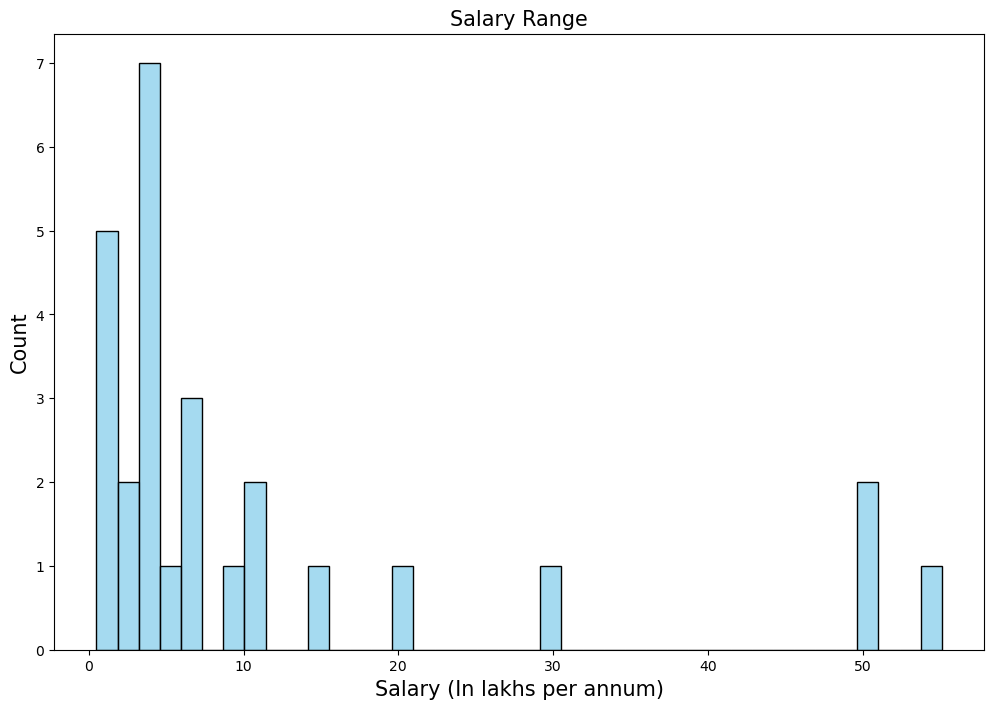

In [32]:
df_salary = df[df['Salary(Lacs p.a.)'] != 'Not Provided'].copy()
df_salary['Salary(Lacs p.a.)'] = df_salary['Salary(Lacs p.a.)'].str.extract(r'([\d.]+)')
df_salary['Salary(Lacs p.a.)'] = df_salary['Salary(Lacs p.a.)'].astype(float)
plt.figure(figsize=(12, 8))
sns.histplot(df_salary['Salary(Lacs p.a.)'], bins=40, kde=False, color='skyblue')
plt.title('Salary Range',fontsize=15)
plt.xlabel('Salary (In lakhs per annum)',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

In [ ]:
# I used this chart to get an insight vizually of the cities providing the most job opportunities with the help of the seaborn library

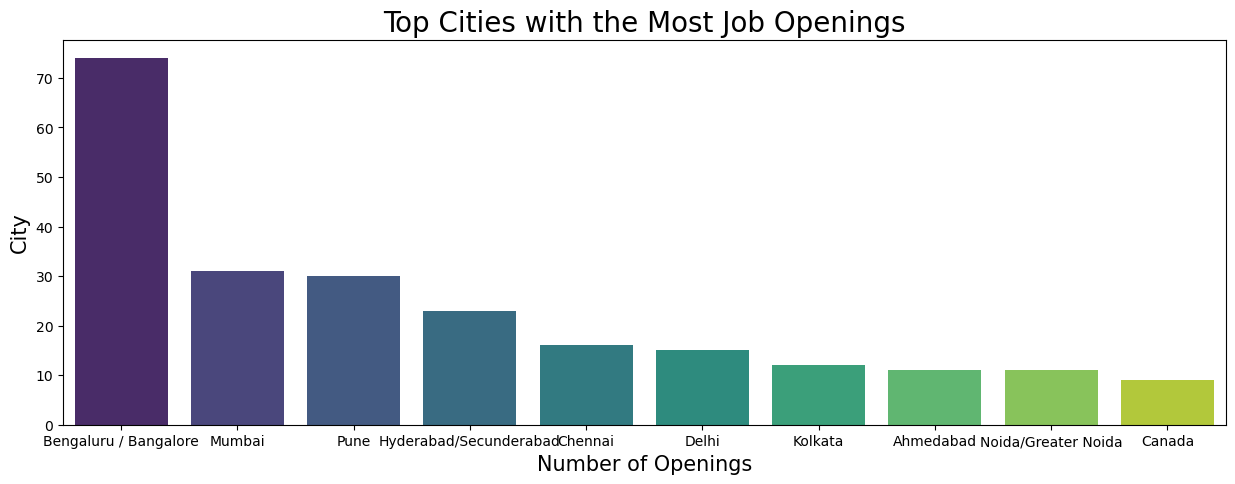

In [26]:
cities = df['Location'].apply(lambda x: x.split(','))
flat_cities = [city.strip() for sublist in cities for city in sublist]
city_counts = pd.Series(flat_cities).value_counts().reset_index()
city_counts.columns = ['City', 'Count']
top_cities = city_counts.head(10)
plt.figure(figsize=(15, 5))
sns.barplot(x='City', y='Count' ,data=top_cities, palette='viridis')
plt.xlabel('Number of Openings',fontsize=15)
plt.ylabel('City',fontsize=15)
plt.title('Top Cities with the Most Job Openings',fontsize=20)
plt.show()


### The culmination of our data scraping project, focused on extracting and analyzing information from a diverse online source TimesJobs, has yielded significant insights and added substantial value to our understanding of the subject matter.Through the meticulous application of data wrangling techniques and the creation of informative visualizations, we have addressed key objectives and drawn noteworthy conclusions.

### Key Findings:

* Patterns and Trends: This data analysis uncovered some unseen patterns and trends within the collected data. This has enhanced the comprehension of industry.

* Data Quality Enhancement: The data wrangling process proved instrumental in addressing data quality issues. Through cleaning, transforming, and aggregating data, I have produced a more reliable dataset suitable for robust analysis.

* Strategic Implications: The insights derived from our visualizations have strategic implications for users. These findings can inform decision-making processes, guide resource allocation, and contribute to the development of effective strategies.

* User-Friendly Visualization: The creation of user-friendly dashboards and visualizations using specific tools has facilitated the communication of complex data-driven insights. This ensures that anyone, regardless of technical expertise, can easily grasp and leverage the findings.